In [1]:
# 대표적인 오차 함수
# MSE/MAE/MAPE/MSLE -(평균 제곱계열)
# 이항분류(binary_crossentropy)/다항분류(categorical_crossentropy)- (교차 엔트로피 계열)



In [2]:
import pandas as pd
df_iris = pd.read_csv("robot/data/iris3.csv")
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


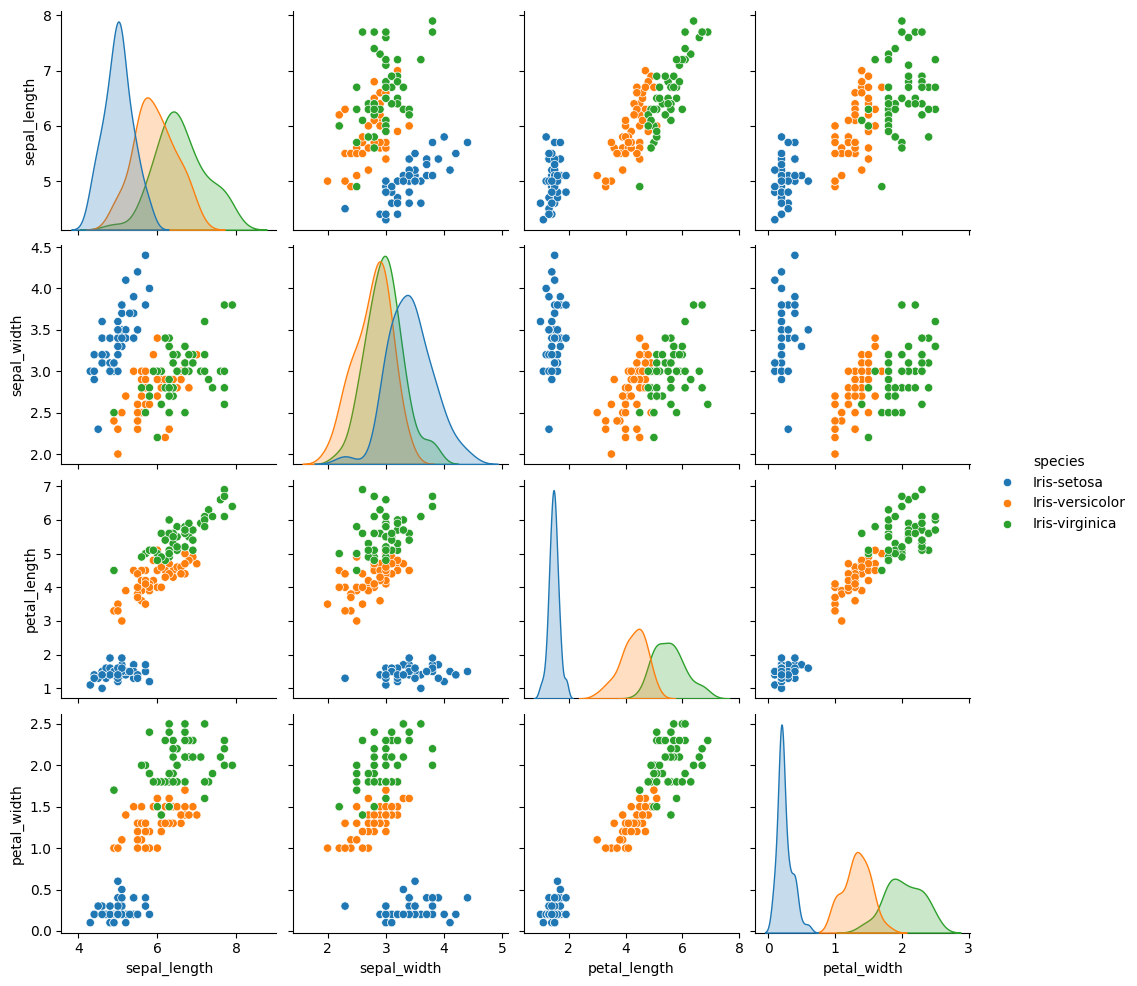

In [5]:
import seaborn as sns #시각화 툴
import matplotlib.pyplot as plt

sns.pairplot(df_iris, hue= "species")
#종에 따라 색이 다르게 feature = 4 (sepal_length,sepal_width,petal_length,petal_width)
plt.show()

In [13]:
# 수치적인 데이터를 통해 회귀,로지스틱 회귀(분류)를 진행했었음.
# 지금 종이라고 했을 때, 종은 범주형 데이터임. 
# 범주형 데이터를 처리하는 방법은 One-Hot Encoding 으로 진행함.
# X 와 y를 분류
X = df_iris.iloc[ : , : 4] # 4개 feature
y = df_iris.iloc[ : , 4] # species 만

# y를 one-hot 인코딩 라이브러리 사용할 수있고,
# pandas의 get_dummies() 를 사용
y = pd.get_dummies(y)

,Iris-setosa,Iris-versicolor,Iris-virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
145,False,False,True
146,False,False,True
147,False,False,True
148,False,False,True


In [16]:
# 딥 러닝 진행
# tensorflow 로
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=4, activation ="relu")) # 12는 원하는 출력값 ,input_dim= feature 개수
# relu = 음수에서 0 , 양수에서 y=x를 따르는 함수
# 은닉층을  추가로 쌓는 작업
model.add(Dense(8,activation = "relu"))
# 로지스틱 회귀처럼 최종 결과가 2개의 카테고리 -> 이진분류 -> crossetropy
# softmax 설명은 이후에 ppt 참고
model.add(Dense(3,activation = "softmax"))

#내가 어떤 입력과 출력을 확인하고 싶으면 모델에 대한 요약
model.summary()

# feature이 4갠데 첫 번째 층에서 12개를 출력하려고 한다.
# n1,n2,n3,...,n12 가 있을 때, 각 x (feature)가 각n에 대한 각각의 가중치를 가짐 w11,w21,w31,w41(x1->n1)
# 총 60개의 가중치를 가짐. (48(x->n) + 12(bias))
# 두 번째 층에서는 104개의 가중치 (13*8)
# 세 번째 층에서는 12+8+3+4(bias)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 12)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 191 (764.00 B)

 Trainable params: 191 (764.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss="categorical_crossentropy",optimizer= "adam" ,metrics = ["accuracy"]) 
# loss 오차를 줄이는 방식
model.fit(X,y, epochs=30 , batch_size=32)

#batch_size : 몇 개 단위로 데이터를 나눠서 업데이트를 할 건지 ?
# 처음 5개의 데이터를 가지고 진행. -> 파라미터(가중치 w, 바이어스 b) 업데이트
# batch_size를 줄이면 줄일 수록  ???
# 기본 디폴트 값은 32개
# batch_size를 150개 라고 한다면 
# -> 150개를 한번에 보고 가중치를 분석하기 때문에 시간은 오래걸리나 더 좋아질 수는 있음
# 데이터 개수에 따른 적절한 batch_size가 필요하다 (16,32)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8333 - loss: 0.3889  
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8733 - loss: 0.3844 
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9467 - loss: 0.3813 
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9667 - loss: 0.3796 
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9667 - loss: 0.3776 
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9667 - loss: 0.3755 
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9600 - loss: 0.3732 
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9600 - loss: 0.3707 
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9333 - loss: 0.3689 
Epoch 10/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9333 - loss: 0.3663 
Epoch 11/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9467 - loss: 0.3641 
Epoch 12/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9600 - loss: 0.3619 


In [22]:
X.shape

(150, 4)

In [127]:
# 광석, 일반 암석 관련 데이터셋 로드
df_mine = pd.read_csv("robot/data/sonar3.csv")
df_mine.head()
# 61개의 컬럼이 있고 0 ~ 59는 feature, 60은 1번이 광석, 0이 일반 암석
df_mine.iloc[ : , 60].value_counts() # 광석 111개, 일반 암석 96개
X = df_mine.iloc[ : , : 60]
y = df_mine.iloc[ : , 60]

# 1) Sequenctial 모듈 로드
from tensorflow.keras.models import Sequential
# 2) Dense 로드
from tensorflow.keras.layers import Dense
# 3) Sequenctial로부터 instance 만드는데 이름은 model
model = Sequential()
# 4) 해당 model에 층을 쌓자
# - 첫 번째 층 : 출력 24개, 활성화 함수 relu
model.add(Dense(24, input_dim=60, activation="relu"))
# - 두 번째 층 : 출력 10개, 활성화 함수 relu
model.add(Dense(10, activation="relu"))
# - 세 번째 층 : 출력 1개, 활성화 함수sigmoid
model.add(Dense(1, activation="sigmoid"))

# 5) 해당 모델 컴파일
# 오차 : binary_crossentropy, 옵티마이저 : adam, 평가지표 : accuracy
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# 6) 학습
# 횟수 : 200번, batch_size : 10번
model.fit(X, y, epochs=200, batch_size=10)

# 과적합을 막기 위해 100개 데이터중 70개는 샘플 30개는 테스트 -> train test split()

Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5314 - loss: 0.7007   
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6473 - loss: 0.6746 
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.6611 
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6812 - loss: 0.6504 
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7053 - loss: 0.6343 
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7150 - loss: 0.6180 
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7585 - loss: 0.5967 
Epoch 8/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7246 - loss: 0.5738 
Epoch 9/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7633 - loss: 0.5542 
Epoch 10/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7633 - loss: 0.5354 
Epoch 11/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7681 - loss: 0.5184 
Epoch 12/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

In [45]:
# 가지고 있는 데이터를 train ,test 로 나누기
!pip list|findstr "scikit"

scikit-learn              1.7.2


In [126]:
from sklearn.model_selection import train_test_split
# 광물
# 붓꽃 -> y를 잘 출력 [0, 0, 0, ..., 1, 1, 1, ..., 2, 2, 2]

# 과적합을 막기 위해 100개 데이터중 70개는 샘플 30개는 테스트 -> train test split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(Dense(24, input_dim=60, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X, y, epochs=100, batch_size=16,verbose = 0)


In [76]:
# 우리가 학습한 model을 가지고
# test data로 평가해보자
score = model.evaluate(X_test, y_test)
print("정확도 :", score[1]) # 0번 인덱스 : lostt, 1번 인덱스 : 내가 설정한 평가지표

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9365 - loss: 0.1971 
정확도 : 0.9365079402923584


In [125]:
# 만약, 폴더가 없다면 만들기
# 시스템 관련 라이브러리
import os

folder_name = "robot/data/model"
# os.mkdir("abc") # abc 폴더를 workspace에 만듬. 다시 실행하면 오류 (이미 있는 폴더이기 때문)
os.path.exists("abc") # 해당 폴더나 파일이 있는지 여부

if not os.path.exists(folder_name):
    os.mkdir(folder_name)
    print(f"{folder_name} 폴더를 생성했습니다.")
else:
    print(f"{folder_name} 폴더가 이미 존재합니다.")

# 나중에 우리가 만든 모델을 사용해야 되는 경우
# tensorflow 에서는 모델을 save ,load를 할 수 있음
file_name = "sonar.keras"
save_path = os.path.join(folder_name,file_name)
# model.save(folder_name + "/" + file_name,save_format="tf")
model.save(save_path ,save_format="tf")

# os.path.join 을 안쓰고 그냥 경로로 결합하는건 안되나 ?
# 된다 . 단, 여러분들의 코드를 다른 os(linux ,mac) 에서 사용할 때
# 다른 연결 방식을 os 라이브러리 쓰면 알아서 os 맞춰서 연결.

robot/data/model 폴더가 이미 존재합니다.


In [89]:
# 인스턴스 model을 우리 메모리(kernal)에서 삭제
del model

In [98]:
# 우리가 만든 모델 불러오기
from tensorflow.keras.models import load_model
model = load_model(save_path)
score = model.evaluate(X_test, y_test)
print("정확도 :", score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9365 - loss: 0.1971 
정확도 : 0.9365079402923584


In [101]:
X.shape
# 207개를 굳이 나눠서 진행하기엔 데이터가 부족함.

(207, 60)

In [124]:
# train-test을 여러 겹으로 나눠서 검증 하는 방법
# K 겹 교차 검증
k = 5 
# 0) 모델을 생성, 층을 쌓고 모델을 리턴하는 함수
def model_fn():
    model = Sequential()
    model.add(Dense(24, input_dim=60, activation="relu"))
    model.add(Dense(10, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

# 1) 5겹으로 나누기
accuracy_list = []
loss_list = []
from sklearn.model_selection import KFold
kfold = KFold(n_splits= k, random_state= 42, shuffle= True) # 5겹으로 나누고 섞자
for train_index,test_index in kfold.split(X):
    # print(train_index,test_index) # 각 값은 인덱스
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # print(X_train.shape,X_test.shape)

    model = model_fn()
    model.fit(X_train, y_train, epochs=100, batch_size=16,verbose = 0)
    
    accuracy = model.evaluate(X_test , y_test)[1]
    accuracy_list.append(accuracy)
    loss =  accuracy = model.evaluate(X_test , y_test)[0]
    loss_list.append(loss)
print("정확도 : ",accuracy_list)
print("평균 정확도 : ",sum(accuracy_list) / k)
print("loss : ",loss_list)
print("평균 loss : ",sum(loss_list) / k)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8095 - loss: 0.5750 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8095 - loss: 0.5750
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7857 - loss: 0.3473 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7857 - loss: 0.3473
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7805 - loss: 0.5147 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7805 - loss: 0.5147
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8537 - loss: 0.3792 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8537 - loss: 0.3792
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9024 - loss: 0.2900 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9024 - loss: 0.2900
정확도 :  [0.8095238208770752, 0.7857142686843872, 0.7804877758026123, 0.8536585569381714, 0.9024389982223511]
평균 정확도 :  0.8263646841049195
loss :  [0.5750262141227722, 0.3473163843154907, 0.5147328972816467, 0.3791893422603607, 0.28997987508773804]
평균 loss :  0.421248942613601

In [128]:
# wine 데이터를 활용한 검증 셋
import warnings
warnings.filterwarnings("ignore")
# output 보는게 불편해서 버전관련 경고 무시.

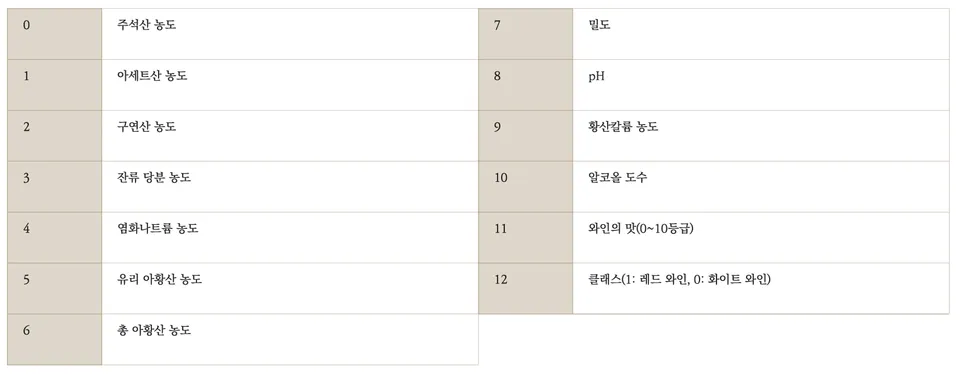

In [129]:
df_wine = pd.read_csv("robot/data/wine.csv")
df_wine.head()

,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,1
0,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1


In [140]:
# data를 나누기
X = df_wine.iloc[ : , : 12]
y = df_wine.iloc[ : , 12]

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle =True)
model = Sequential()
model.add(Dense(30,input_dim = 12, activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
# model.summary()
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

# 모델 실행
# 검증 셋 비율을 0.25로 두자
# 전체 데이터 데비 train : test = 0.8 : 0.2
# train 대비 학습:검증 = 0.75 : 0.25
# 전체 데이터 대비 학습 : 검증 : test = 0.6 : 0.2 : 0.2
model.fit(X_train,y_train, epochs=50, batch_size=500, verbose=0,validation_split=0.25)

In [154]:
score = model.evaluate(X_test,y_test)
print(score)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9800 - loss: 0.0626 
[0.06260642409324646, 0.9800000190734863]


In [137]:
# 학습할 때, 학습 데이터가 100이라고 하면,
# 이것을 일정 부분 쪼개서
# 학습에 사용하지 않고, 마치 테스트처럼 검증하는 용도로 사용하면 어떨까 ?
# 데이터 셋 -> 학습80 테스트 20 , 이 중 학습 80을 다시 학습 60 테스트20으로 나눔

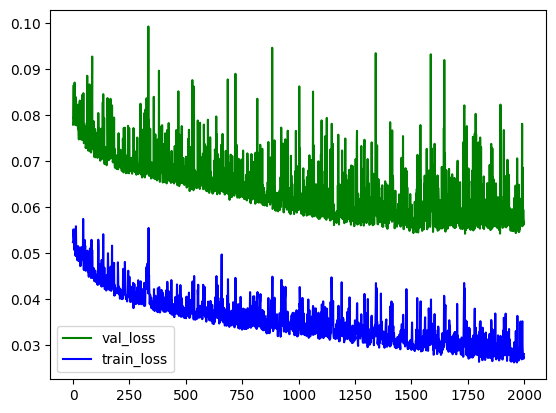

In [157]:
# 그래프로 적절한 에포크 수 확인하기
# 과적합 정도 확인하기
history = model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)
df_history = pd.DataFrame(history.history)

# 검증셋의 오차 정도
val_l = df_history["val_loss"]

# 학습셋의 오차 정도
train_l = df_history["loss"]

import matplotlib.pyplot as plt
import numpy as np
x_axis = np.arange(len(val_l))
plt.plot(x_axis, val_l, c="green", label="val_loss")
plt.plot(x_axis, train_l, c="blue", label="train_loss")
plt.legend()
plt.show()

In [161]:
# 어떤 조건하에 학습을 멈추고 싶다
# Loss 가 epochs가 20번 도는 동안 그렇게 유의미하게 변화하지 않는다.
# wine 데이터 가지고
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# 학습이 2000번 진행 됨
# 그 중 특정 조건하에 학습 중단
# val_loss를 관찰하다가 20번동안 변화가 없으면 중단
early_stop = EarlyStopping(monitor = "val_loss",patience=20)

# 2000번 이전에 멈춘다면 해당 model을 물리적으로 저장하자.
folder_name = "robot/data/model"
file_name = "wine.keras"
path = os.path.join(folder_name,file_name)
# save_best_only : True -> 그 때 까지 중 가장 좋은 모델 저장
# save_best_only : False -> 마지막 모델을 저장
check_point = ModelCheckpoint(filepath = path,monitor="val_loss",verbose=0, save_best_only = True)
model.fit(X_train, y_train, epochs=2000, batch_size=500, 
          verbose=1, validation_split=0.25,callbacks=[early_stop,check_point])

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9910 - loss: 0.0282 - val_accuracy: 0.9869 - val_loss: 0.0559
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9920 - loss: 0.0262 - val_accuracy: 0.9846 - val_loss: 0.0583
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9918 - loss: 0.0277 - val_accuracy: 0.9869 - val_loss: 0.0560
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9910 - loss: 0.0287 - val_accuracy: 0.9846 - val_loss: 0.0624
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9910 - loss: 0.0268 - val_accuracy: 0.9877 - val_loss: 0.0571
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9908 - loss: 0.0298 - val_accuracy: 0.9869 - val_loss: 0.0590
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9918 - loss: 0.0265 - val_accuracy: 0.9854 - val_loss: 0.0575
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9918 - loss: 0.0268 - val_accuracy: 0.9861 - v

In [164]:
# 저장한 모델을 불러와서 test 를 통해 평가
from tensorflow.keras.models import load_model
model2 = load_model(path)
score = model2.evaluate(X_test,y_test)
score

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9854 - loss: 0.1409  


[0.14089526236057281, 0.9853846430778503]

In [166]:
# 데이터 유형을 조금 여러 개 다뤄보기
df_house_train = pd.read_csv("robot/data/house_train.csv")
df_house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [172]:
# 결측치가 있는 columns -> row 합산 -> 내림차순 -> 상위 20개 확인하는 문장
df_house_train.isnull().sum().sort_values(ascending =False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64

In [177]:
# 범주형 데이터 One-Hot Encoding
df_house_train = pd.get_dummies(df_house_train)
df_house_train.info() # 81개 컬럼이 289 개의 컬럼으로 늘어남
# 수치형 데이터는 결측치를 채워야함 -> 평균으로
df_house_train = df_house_train.fillna(df_house_train.mean())
df_house_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 289 entries, Id to SaleCondition_Partial
dtypes: bool(251), float64(3), int64(35)
memory usage: 791.4 KB


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False


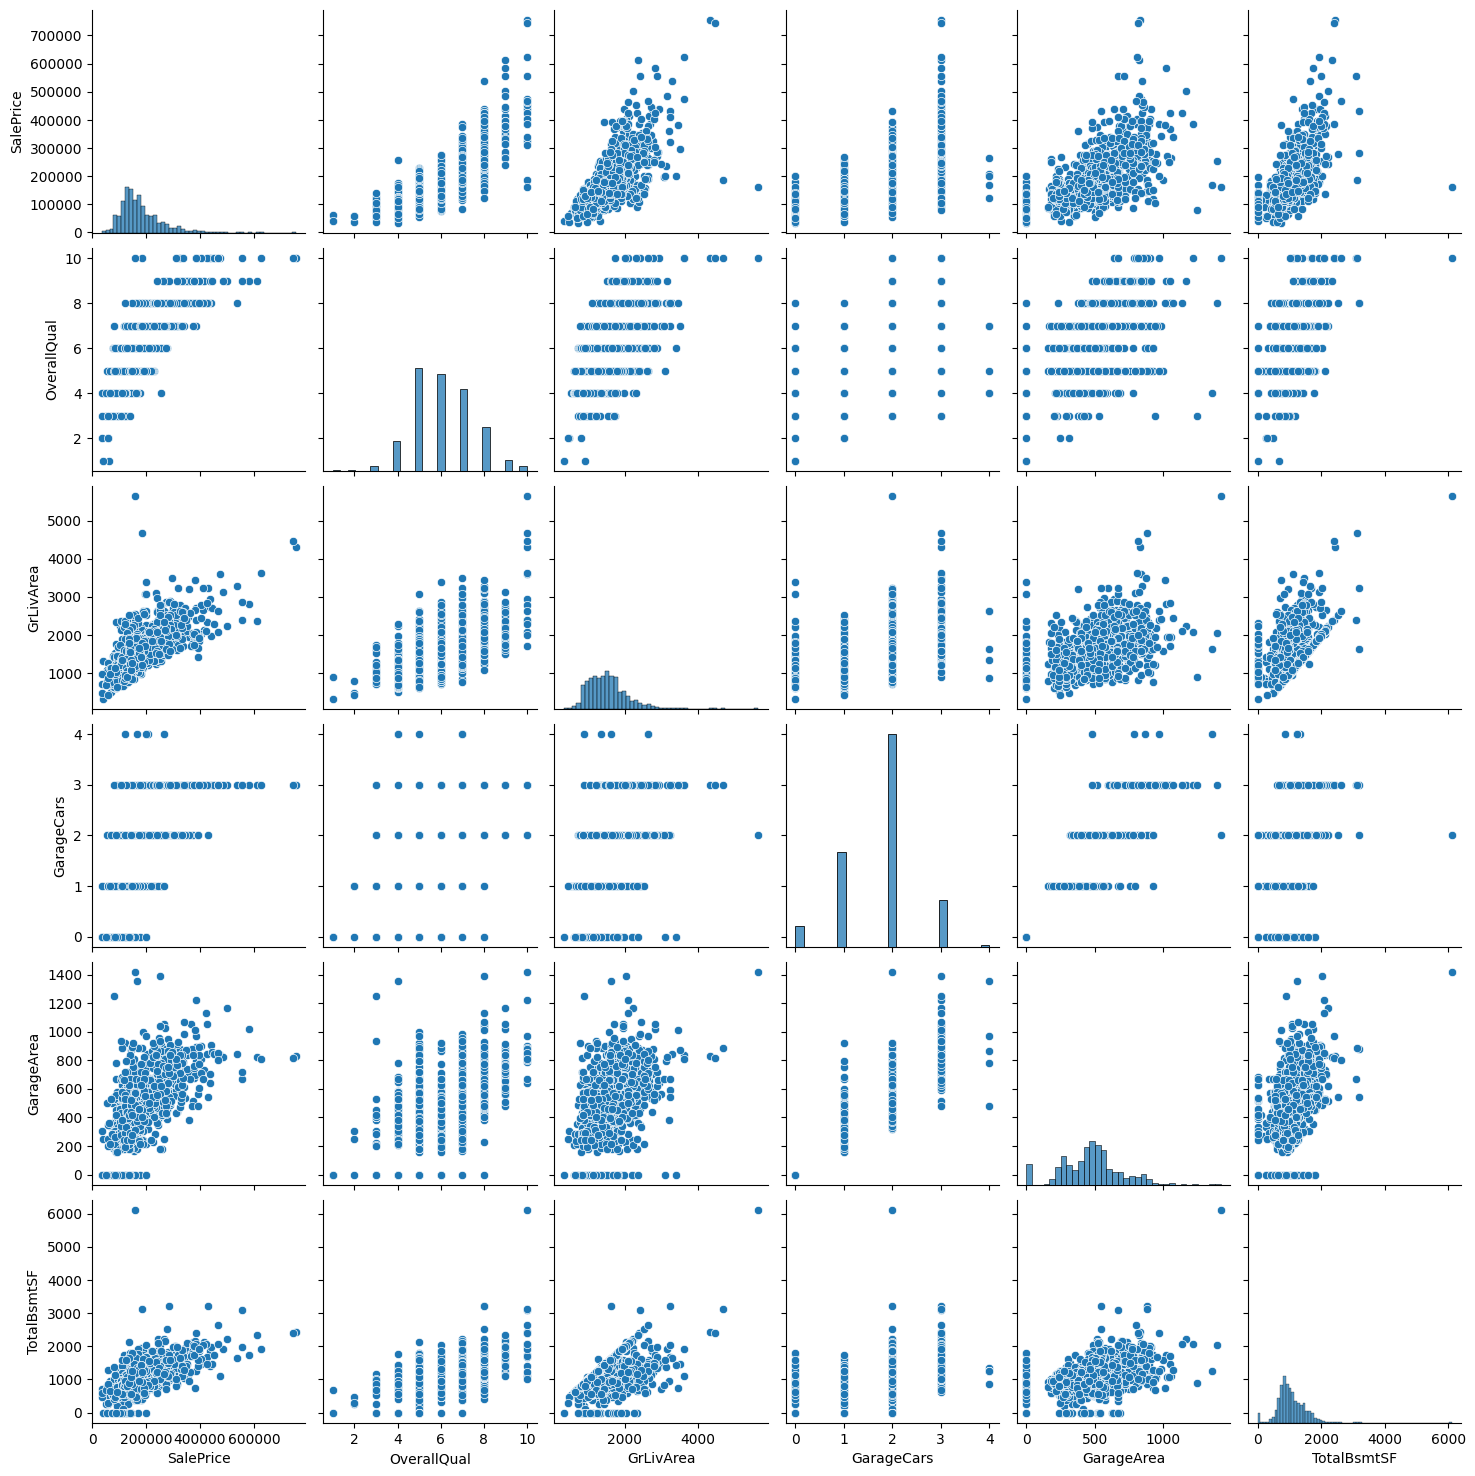

In [186]:
# 289개의 컬럼을 어찌할 것인가 ?
# 상관계수
df_house_corr = df_house_train.corr()

df_house_sort = df_house_corr.sort_values("SalePrice",ascending=False)
df_house_sort["SalePrice"].head(10) # 해당 컬럼들을 보고 선택해서 그래프 그리기
cols = ["SalePrice","OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF"]
sns.pairplot(df_house_train[cols])
plt.show()

In [206]:
train_cols = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF"]
X_pre = df_house_train[train_cols]
y_pre = df_house_train.loc[:,"SalePrice"]


# train_test_split으로 test데이터를 20% 분배
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X_train,X_test,y_train,y_test = train_test_split(X_pre, y_pre, test_size=0.2, shuffle= True)
# model 생성
model = Sequential()
# model 적층
# 1층 : 출력 10 , input_dim = X_pre.shape[1], activation = "relu"
model.add(Dense(10,input_dim = X_pre.shape[1],activation = "relu"))
# 2층 : 출력 30, relu
model.add(Dense(30,activation="relu"))
# 3층 : 출력 40, relu
model.add(Dense(40, activation="relu"))
# 4층 : 출력 1
model.add(Dense(1))

# 컴파일 
# loss: "mean_squared_error", optimizer = "adam"
model.compile(loss="mean_squared_error", optimizer="adam")
# 학습 :200번 ,검증 셋 비율 :0.25
model.fit(X_train, y_train, epochs = 100, batch_size=70, validation_split=0.25,verbose= 0)


In [204]:
score = model.evaluate(X_test,y_test)
score

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1654455808.0000 


1654455808.0

In [219]:
# 이미지 분석
# MNIST 데이터셋
from tensorflow.keras.datasets import mnist# 손글씨 관련 MNIST 데이터셋
# dataset = mnist.load_data() # 튜플 형태
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape # 6만개의 데이터 28*28 = 784개의 feature
X_test.shape # 1만개의 데이터 28*28 = 784개의 feature

(10000, 28, 28)

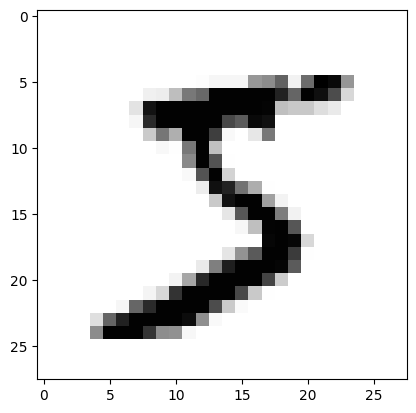

In [226]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0],cmap="Grays")
plt.show()

In [232]:
for x in X_train[0]:
    for i in x:
        print(f"{i:<3d}",end="")
    print()

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [264]:
# 이미지 분석
# MNIST 데이터셋
from tensorflow.keras.datasets import mnist# 손글씨 관련 MNIST 데이터셋

# dataset = mnist.load_data() # 튜플 형태
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train.shape # 6만개의 데이터 28*28 = 784개의 feature
X_test.shape # 1만개의 데이터 28*28 = 784개의 feature

# 784개의 feature를 줄이자 : 차원축소
# 1) 28 X 28 을 784로 차원을 낮추자
# 28 X 28 : 2차원
# 1차원 784개로 만들기
# 60000 X 28 X 28 -> 60000 X 784
X_train = X_train.reshape(X_train.shape[0], 784)

# 2) 0 ~ 255 범위를 0 ~ 1로 줄이자
# 정수 연산 전에 값들을 실수로 캐스팅
X_train = X_train.astype("float32")
X_train = X_train / 255

# X_test 도 같은 변환
X_test = X_test.reshape(X_test.shape[0], 784).astype("float32") / 255

In [265]:
print(X_train.shape, y_train.shape)
print(X_train[0], y_train[0])

(60000, 784) (60000,)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         

In [266]:
y_train[0] # 5 인데
# y를 One-Hot encoding 하여
# class = 5
# [0,0,0,0,0,1,0,0,0,0] label을 다음과 같이 변환
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [ ]:
# X_train : 60000 x 784
# y_train: 10개의 클래스가 원-핫인코딩
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(512,input_dim=784,activation="relu"))
model.add(Dense(10,activation="softmax"))
# model.summary()

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X_train,y_train, epochs=30,batch_size=200, validation_split=0.25,verbose=1)

In [275]:
# 통합 
from tensorflow.keras.datasets import mnist # 손글씨 관련 MNIST 데이터셋
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Dense(512, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30, batch_size=200, validation_split=0.25, verbose=0)
score = model.evaluate(X_test,y_test)
print("정확도 : ",score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9823 - loss: 0.0730
정확도 :  0.9822999835014343


In [ ]:
# 이미지 성능을 향상시키기 위한 
# CNN(Convolutional Neural Network)
# 커널을 통과해서 나온 층을 합성곱 층 (Convolution Layer) : 특징을 대략적으로 추출해서 학습가능 (리소스감소)
# 커널이 n 개 있으면 컨볼루션 층도 n개가 생김

# 1) 784 -> 512(relu) -> 10 (softmax)  정확도 0.09823
# 2) 28 x 28 -> CNN(32, 3x3,relu) -> CNN (64,3x3,relu)
# -> 평탄화 (차원을 낮추는 과정) -> 512(relu) -> 10 (softmax) 정확도: 0.9894
# 3) 28 x 28 -> CNN(32, 3x3,relu) -> CNN (64,3x3,relu) -> 풀링(맥스,2x2), Dropout(0.25)
# -> 평탄화 (차원을 낮추는 과정) -> 512(relu),Dropout(0.5)  -> 10 (softmax)

In [279]:
# 동일한 코드에 CNN 적용해보기
from tensorflow.keras.datasets import mnist # 손글씨 관련 MNIST 데이터셋
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# feature를 1차원으로 만들어서 모델에 적용
# CNN은 최소 2차원으로
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
# 32개의 필터, 적용할 커널 사이즈 3*3
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation = "relu"))
# 64개의 필터, 적용할 커널 사이즈 3*3
model.add(Conv2D(64,kernel_size=(3,3),activation = "relu"))
# 원래라면 28*28 = 784로 차원을 낮추는 행위
# 차원을 평평하게 만들어야함
model.add(Flatten())
# 512개의 노드
model.add(Dense(512, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30, batch_size=200, validation_split=0.25, verbose=1)
score = model.evaluate(X_test,y_test)
print("정확도 : ",score[1])

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 43s 186ms/step - accuracy: 0.9527 - loss: 0.1544 - val_accuracy: 0.9773 - val_loss: 0.0774
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.9875 - loss: 0.0387 - val_accuracy: 0.9799 - val_loss: 0.0645
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9843 - val_loss: 0.0554
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.9969 - loss: 0.0099 - val_accuracy: 0.9811 - val_loss: 0.0745
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 183ms/step - accuracy: 0.9983 - loss: 0.0061 - val_accuracy: 0.9837 - val_loss: 0.0741
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 42s 185ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.9831 - val_loss: 0.0696
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.9985 - loss: 0.0045 - val_accuracy: 0.9843 - val_loss: 0.0665
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 41s 184ms/step - accuracy: 0.9983 - loss: 0

In [ ]:
# 맥스풀링 : 
# 드롭아웃 : 과적합을 피하기 위한 기법. 은닉층에 배치된 너드 중 일부를 임의로 꺼주는 기능

In [280]:
# 동일한 코드에 풀링, 드롭아웃 적용
from tensorflow.keras.datasets import mnist # 손글씨 관련 MNIST 데이터셋
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# feature를 1차원으로 만들어서 모델에 적용
# CNN은 최소 2차원으로
X_train = X_train.reshape(X_train.shape[0], 28,28,1).astype("float32") / 255
X_test = X_test.reshape(X_test.shape[0], 28,28,1).astype("float32") / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(28,28,1),activation = "relu"))
model.add(Conv2D(64,kernel_size=(3,3),activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=30, batch_size=200, validation_split=0.25, verbose=1)
score = model.evaluate(X_test,y_test)
print("정확도 : ",score[1])

Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 23s 95ms/step - accuracy: 0.9342 - loss: 0.2184 - val_accuracy: 0.9821 - val_loss: 0.0608
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 22s 96ms/step - accuracy: 0.9814 - loss: 0.0610 - val_accuracy: 0.9850 - val_loss: 0.0522
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9864 - loss: 0.0442 - val_accuracy: 0.9857 - val_loss: 0.0474
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9897 - loss: 0.0327 - val_accuracy: 0.9881 - val_loss: 0.0414
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.9915 - loss: 0.0261 - val_accuracy: 0.9881 - val_loss: 0.0395
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9932 - loss: 0.0217 - val_accuracy: 0.9889 - val_loss: 0.0381
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.9932 - loss: 0.0205 - val_accuracy: 0.9867 - val_loss: 0.0471
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 20s 87ms/step - accuracy: 0.9945 - loss: 0.0162 - 

In [ ]:
# AWS중에서 Amazon Rekognition 서비스 활용하여
# 나랑 박보검이랑 유사도가 몇 % 인지 확인해보자
# 1) AWS 계정 엑세스 설정 完
# 2) 코드 

In [ ]:
# 특정 라이브러리들은 pip3로 설치해야 되는 경우가 있음
# pip -> 라이브러리를 python 버전에 맞춰 알아서 설치
# 간혹 python 2 <-> 3 (버전마다 되는게 있고 안되는게 있음)
# pip3은 3버전으로 강제설치
!pip3 install boto3

In [288]:
import boto3

def compare_faces(sourceFile, targetFile):

    client = boto3.client('rekognition')

    imageSource = open(sourceFile, 'rb')
    imageTarget = open(targetFile, 'rb')

    response = client.compare_faces(SimilarityThreshold=0,
                                    SourceImage={'Bytes': imageSource.read()},
                                    TargetImage={'Bytes': imageTarget.read()})

    for faceMatch in response['FaceMatches']:
        position = faceMatch['Face']['BoundingBox']
        
        # 사용자를 위한 UI
        print(f"동일 인물일 확률 : {faceMatch['Similarity'] :.2f}%")
        
        similarity = str(faceMatch['Similarity'])
        print('The face at ' +
              str(position['Left']) + ' ' +
              str(position['Top']) +
              ' matches with ' + similarity + '% confidence')

    imageSource.close()
    imageTarget.close()
    return len(response['FaceMatches'])

def main():
    source_file = 'imgs/pbk2.jpeg'
    target_file = 'imgs/pbk.jpeg'
    face_matches = compare_faces(source_file, target_file)
    print("Face matches: " + str(face_matches))

if __name__ == "__main__":
    main()

동일 인물일 확률 : 99.82%
The face at 0.48378732800483704 0.2741897702217102 matches with 99.82161712646484% confidence
Face matches: 1


In [297]:
import boto3
import json

def detect_faces(photo):
    
    client = boto3.client('rekognition')
    with open(photo,"rb") as image:
        response = client.detect_faces(Image={'Bytes':image.read()}, Attributes=['ALL'])

    print('Detected faces for ' + photo)
    for faceDetail in response['FaceDetails']:
        print('The detected face is between ' + str(faceDetail['AgeRange']['Low'])
              + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old')

        print('Here are the other attributes:')
        # print(json.dumps(faceDetail, indent=4, sort_keys=True))

        # Access predictions for individual face details and print them
        
        # 사용자를 위한 UI
        # 성별 : 남성(혹은 여성)
        # 나이 : 20세 (18~22의 평균)
        # 감정 : Calm
        print(" 성별 :", (faceDetail['Gender']))
        print(" 나이 : ", (int(faceDetail['AgeRange']['Low']+ int(faceDetail['AgeRange']['High']))/2))
        print(" 감정 : ", (faceDetail['Emotions'][0]))
        
        print("Gender: " + str(faceDetail['Gender']))
        print("Smile: " + str(faceDetail['Smile']))
        print("Eyeglasses: " + str(faceDetail['Eyeglasses']))
        print("Face Occluded: " + str(faceDetail['FaceOccluded']))
        print("Emotions: " + str(faceDetail['Emotions'][0]))

    return len(response['FaceDetails'])
    
def main():
    photo='imgs/Ryu.jpg'
    face_count=detect_faces(photo)
    print("Faces detected: " + str(face_count))

if __name__ == "__main__":
    main()


Detected faces for imgs/Ryu.jpg
The detected face is between 18 and 22 years old
Here are the other attributes:
 성별 : {'Value': 'Male', 'Confidence': 99.99946594238281}
 나이 :  20.0
 감정 :  {'Type': 'CALM', 'Confidence': 99.86048889160156}
Gender: {'Value': 'Male', 'Confidence': 99.99946594238281}
Smile: {'Value': False, 'Confidence': 99.81088256835938}
Eyeglasses: {'Value': False, 'Confidence': 99.92916107177734}
Face Occluded: {'Value': False, 'Confidence': 98.825439453125}
Emotions: {'Type': 'CALM', 'Confidence': 99.86048889160156}
Faces detected: 1
